# Instalação do PySUS na máquina remota

In [ ]:
# Isso instala direto do repositório oficial da Fiocruz/AlertaDengue, já que o PySUS não é atualizado com frequência no PyPI
# !pip install git+https://github.com/AlertaDengue/PySUS.git

In [ ]:
# !pip install kmodes

In [1]:
!pip install pandas pyarrow polars

In [2]:
import pandas as pd
import polars as pl
from sklearn.preprocessing import StandardScaler
# from kmodes.kprototypes import KPrototypes
# from pysus.online_data import SIH
import glob

# Download de arquivos do ambiente DataSUS para Google Drive em formato Parquet

In [ ]:
# df_rd = SIH.download(states="SC", years=[2015,2016,2017, 2018,2019], months=[1,2,3,4,5,6,7,8,9,10,11,12], groups="RD", data_dir='/content/drive/MyDrive/Universidades/UFSC/Disciplinas/20252/Content Detection and Big Web Data Analysis/Artigo/Projeto/SC/rd')
# df_cm = SIH.download(states="SC", years=2023, months=[1,2,3,4,5,6,7,8,9,10,11,12], groups="CM", data_dir='/content/drive/MyDrive/Universidades/UFSC/Disciplinas/20252/Content Detection and Big Web Data Analysis/Artigo/Projeto/SC/cm')
# df_sp = SIH.download(states="SC", years=2023, months=[1,2,3,4,5,6,7,8,9,10,11,12], groups="SP", data_dir='/content/drive/MyDrive/Universidades/UFSC/Disciplinas/20252/Content Detection and Big Web Data Analysis/Artigo/Projeto/SC/sp')
# df_ch = SIH.download(states="SC", years=2023, months=[1,2,3,4,5,6,7,8,9,10,11,12], groups="CH", data_dir='/content/drive/MyDrive/Universidades/UFSC/Disciplinas/20252/Content Detection and Big Web Data Analysis/Artigo/Projeto/SC/ch')


# Cópia de arquivos parquet para ambiente local

In [3]:
# verifica tamanho dos arquivos parquet
!du -sh '/content/drive/MyDrive/Universidades/UFSC/Disciplinas/20252/Content Detection and Big Web Data Analysis/Artigo/Projeto/SC/rd/'

284M	/content/drive/MyDrive/Universidades/UFSC/Disciplinas/20252/Content Detection and Big Web Data Analysis/Artigo/Projeto/SC/rd/


In [4]:
# Cópia RD temporária do Drive para ambiente local
!cp -r "/content/drive/MyDrive/Universidades/UFSC/Disciplinas/20252/Content Detection and Big Web Data Analysis/Artigo/Projeto/SC/rd/" /content/

In [5]:
# Lista os arquivos existentes no ambiente local
!ls -lh /content/rd

total 480K
drwx------ 2 root root 4.0K Dec  2 00:34 RDSC1501.parquet
drwx------ 2 root root 4.0K Dec  2 00:34 RDSC1502.parquet
drwx------ 2 root root 4.0K Dec  2 00:34 RDSC1503.parquet
drwx------ 2 root root 4.0K Dec  2 00:34 RDSC1504.parquet
drwx------ 2 root root 4.0K Dec  2 00:35 RDSC1505.parquet
drwx------ 2 root root 4.0K Dec  2 00:35 RDSC1506.parquet
drwx------ 2 root root 4.0K Dec  2 00:35 RDSC1507.parquet
drwx------ 2 root root 4.0K Dec  2 00:35 RDSC1508.parquet
drwx------ 2 root root 4.0K Dec  2 00:35 RDSC1509.parquet
drwx------ 2 root root 4.0K Dec  2 00:35 RDSC1510.parquet
drwx------ 2 root root 4.0K Dec  2 00:35 RDSC1511.parquet
drwx------ 2 root root 4.0K Dec  2 00:35 RDSC1512.parquet
drwx------ 2 root root 4.0K Dec  2 00:35 RDSC1601.parquet
drwx------ 2 root root 4.0K Dec  2 00:35 RDSC1602.parquet
drwx------ 2 root root 4.0K Dec  2 00:35 RDSC1603.parquet
drwx------ 2 root root 4.0K Dec  2 00:35 RDSC1604.parquet
drwx------ 2 root root 4.0K Dec  2 00:35 RDSC1605.parquet
drw

# Extração de dados dos arquivos parquet

In [6]:
# Caminho da pasta onde estão os arquivos RD
caminho_rd = "/content/rd/"

# Lista todos os arquivos .parquet no diretório
arquivos = glob.glob(caminho_rd + "*.parquet")

# # Lê e concatena todos os DataFrames
df_aih_rd = pl.concat([pl.read_parquet(arquivo) for arquivo in arquivos])

# # Exibe resultado
print("Total de arquivos lidos:", len(arquivos))
print("Total de linhas:", len(df_aih_rd))
df_aih_rd.head()


Total de arquivos lidos: 120
Total de linhas: 5068006


UF_ZI,ANO_CMPT,MES_CMPT,ESPEC,CGC_HOSP,N_AIH,IDENT,CEP,MUNIC_RES,NASC,SEXO,UTI_MES_IN,UTI_MES_AN,UTI_MES_AL,UTI_MES_TO,MARCA_UTI,UTI_INT_IN,UTI_INT_AN,UTI_INT_AL,UTI_INT_TO,DIAR_ACOM,QT_DIARIAS,PROC_SOLIC,PROC_REA,VAL_SH,VAL_SP,VAL_SADT,VAL_RN,VAL_ACOMP,VAL_ORTP,VAL_SANGUE,VAL_SADTSR,VAL_TRANSP,VAL_OBSANG,VAL_PED1AC,VAL_TOT,VAL_UTI,…,INFEHOSP,CID_ASSO,CID_MORTE,COMPLEX,FINANC,FAEC_TP,REGCT,RACA_COR,ETNIA,SEQUENCIA,REMESSA,AUD_JUST,SIS_JUST,VAL_SH_FED,VAL_SP_FED,VAL_SH_GES,VAL_SP_GES,VAL_UCI,MARCA_UCI,DIAGSEC1,DIAGSEC2,DIAGSEC3,DIAGSEC4,DIAGSEC5,DIAGSEC6,DIAGSEC7,DIAGSEC8,DIAGSEC9,TPDISEC1,TPDISEC2,TPDISEC3,TPDISEC4,TPDISEC5,TPDISEC6,TPDISEC7,TPDISEC8,TPDISEC9
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,…,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""420460""","""2019""","""11""","""01""","""92736040000890""","""4219100719317""","""1""","""88815600""","""420460""","""19911019""","""1""",""" 0""",""" 0""",""" 0""",""" 0""","""00""",""" 0""",""" 0""",""" 0""",""" 0""",""" 0""",""" 1""","""0401020088""","""0401020088""",""" 112.43""",""" 55.29""",""" 0.00""",""" 0.00""",""" 0.00""",""" 0.00""",""" 0.00""",""" 0.00""",""" 0.00""",""" 0.00""",""" 0.00""",""" 167.72""",""" 0.00""",…,""" ""","""0000""","""0000""","""02""","""06""",""" ""","""0000""","""01""","""0000""",""" 46""","""HM42046001N201911.DTS""",""" …",""" …",""" 0.00""",""" 0.00""",""" 0.00""",""" 0.00""",""" 0.00""","""00""",""" """,""" """,""" """,""" """,""" """,""" """,""" """,""" """,""" ""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0"""
"""420460""","""2019""","""11""","""01""","""92736040000890""","""4219100719328""","""1""","""88865000""","""421160""","""19671231""","""3""",""" 0""",""" 0""",""" 0""",""" 0""","""00""",""" 0""",""" 0""",""" 0""",""" 0""",""" 0""",""" 1""","""0407020217""","""0407020217""",""" 166.16""",""" 80.65""",""" 0.00""",""" 0.00""",""" 0.00""",""" 0.00""",""" 0.00""",""" 0.00""",""" 0.00""",""" 0.00""",""" 0.00""",""" 246.81""",""" 0.00""",…,""" ""","""0000""","""0000""","""02""","""06""",""" ""","""0000""","""01""","""0000""",""" 47""","""HM42046001N201911.DTS""",""" …",""" …",""" 0.00""",""" 0.00""",""" 0.00""",""" 0.00""",""" 0.00""","""00""",""" """,""" """,""" """,""" """,""" """,""" """,""" """,""" """,""" ""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0"""
"""420460""","""2019""","""11""","""01""","""92736040000890""","""4219100719339""","""1""","""88805120""","""420460""","""19761214""","""1""",""" 0""",""" 0""",""" 0""",""" 0""","""00""",""" 0""",""" 0""",""" 0""",""" 0""",""" 0""",""" 1""","""0412010119""","""0412010119""",""" 355.56""",""" 160.66""",""" 0.00""",""" 0.00""",""" 0.00""",""" 0.00""",""" 0.00""",""" 0.00""",""" 0.00""",""" 0.00""",""" 0.00""",""" 516.22""",""" 0.00""",…,""" ""","""0000""","""0000""","""02""","""06""",""" ""","""0000""","""01""","""0000""",""" 48""","""HM42046001N201911.DTS""",""" …",""" …",""" 0.00""",""" 0.00""",""" 0.00""",""" 0.00""",""" 0.00""","""00""",""" """,""" """,""" """,""" """,""" """,""" """,""" """,""" """,""" ""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0"""
"""420460""","""2019""","""11""","""01""","""92736040000890""","""4219100719450""","""1""","""88818000""","""420460""","""19970925""","""1""",""" 0""",""" 0""",""" 0""",""" 0""","""00""",""" 0""",""" 0""",""" 0""",""" 0""",""" 0""",""" 1""","""0408010215""","""0408010215""",""" 243.09""",""" 166.74""",""" 0.00""",""" 0.00""",""" 0.00""",""" 0.00""",""" 0.00""",""" 0.00""",""" 0.00""",""" 0.00""",""" 0.00""",""" 409.83""",""" 0.00""",…,""" ""","""0000""","""0000""","""02""","""06""",""" ""","""0000""","""01""","""0000""",""" 49""","""HM42046001N201911.DTS""",""" …",""" …",""" 0.00""",""" 0.00""",""" 0.00""",""" 0.00""",""" 0.00""","""00""","""W189""",""" "

In [7]:
df_aih_rd.shape

(5068006, 113)

In [8]:
df_aih_rd.columns

['UF_ZI',
 'ANO_CMPT',
 'MES_CMPT',
 'ESPEC',
 'CGC_HOSP',
 'N_AIH',
 'IDENT',
 'CEP',
 'MUNIC_RES',
 'NASC',
 'SEXO',
 'UTI_MES_IN',
 'UTI_MES_AN',
 'UTI_MES_AL',
 'UTI_MES_TO',
 'MARCA_UTI',
 'UTI_INT_IN',
 'UTI_INT_AN',
 'UTI_INT_AL',
 'UTI_INT_TO',
 'DIAR_ACOM',
 'QT_DIARIAS',
 'PROC_SOLIC',
 'PROC_REA',
 'VAL_SH',
 'VAL_SP',
 'VAL_SADT',
 'VAL_RN',
 'VAL_ACOMP',
 'VAL_ORTP',
 'VAL_SANGUE',
 'VAL_SADTSR',
 'VAL_TRANSP',
 'VAL_OBSANG',
 'VAL_PED1AC',
 'VAL_TOT',
 'VAL_UTI',
 'US_TOT',
 'DT_INTER',
 'DT_SAIDA',
 'DIAG_PRINC',
 'DIAG_SECUN',
 'COBRANCA',
 'NATUREZA',
 'NAT_JUR',
 'GESTAO',
 'RUBRICA',
 'IND_VDRL',
 'MUNIC_MOV',
 'COD_IDADE',
 'IDADE',
 'DIAS_PERM',
 'MORTE',
 'NACIONAL',
 'NUM_PROC',
 'CAR_INT',
 'TOT_PT_SP',
 'CPF_AUT',
 'HOMONIMO',
 'NUM_FILHOS',
 'INSTRU',
 'CID_NOTIF',
 'CONTRACEP1',
 'CONTRACEP2',
 'GESTRISCO',
 'INSC_PN',
 'SEQ_AIH5',
 'CBOR',
 'CNAER',
 'VINCPREV',
 'GESTOR_COD',
 'GESTOR_TP',
 'GESTOR_CPF',
 'GESTOR_DT',
 'CNES',
 'CNPJ_MANT',
 'INFEHOSP',
 'C

# Análise exploratória de dados (EDA)

In [9]:
# Baixar internações hospitalares de Santa Catarina para todo período de 2015 a 2024
df_aih_rd.head()

UF_ZI,ANO_CMPT,MES_CMPT,ESPEC,CGC_HOSP,N_AIH,IDENT,CEP,MUNIC_RES,NASC,SEXO,UTI_MES_IN,UTI_MES_AN,UTI_MES_AL,UTI_MES_TO,MARCA_UTI,UTI_INT_IN,UTI_INT_AN,UTI_INT_AL,UTI_INT_TO,DIAR_ACOM,QT_DIARIAS,PROC_SOLIC,PROC_REA,VAL_SH,VAL_SP,VAL_SADT,VAL_RN,VAL_ACOMP,VAL_ORTP,VAL_SANGUE,VAL_SADTSR,VAL_TRANSP,VAL_OBSANG,VAL_PED1AC,VAL_TOT,VAL_UTI,…,INFEHOSP,CID_ASSO,CID_MORTE,COMPLEX,FINANC,FAEC_TP,REGCT,RACA_COR,ETNIA,SEQUENCIA,REMESSA,AUD_JUST,SIS_JUST,VAL_SH_FED,VAL_SP_FED,VAL_SH_GES,VAL_SP_GES,VAL_UCI,MARCA_UCI,DIAGSEC1,DIAGSEC2,DIAGSEC3,DIAGSEC4,DIAGSEC5,DIAGSEC6,DIAGSEC7,DIAGSEC8,DIAGSEC9,TPDISEC1,TPDISEC2,TPDISEC3,TPDISEC4,TPDISEC5,TPDISEC6,TPDISEC7,TPDISEC8,TPDISEC9
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,…,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""420460""","""2019""","""11""","""01""","""92736040000890""","""4219100719317""","""1""","""88815600""","""420460""","""19911019""","""1""",""" 0""",""" 0""",""" 0""",""" 0""","""00""",""" 0""",""" 0""",""" 0""",""" 0""",""" 0""",""" 1""","""0401020088""","""0401020088""",""" 112.43""",""" 55.29""",""" 0.00""",""" 0.00""",""" 0.00""",""" 0.00""",""" 0.00""",""" 0.00""",""" 0.00""",""" 0.00""",""" 0.00""",""" 167.72""",""" 0.00""",…,""" ""","""0000""","""0000""","""02""","""06""",""" ""","""0000""","""01""","""0000""",""" 46""","""HM42046001N201911.DTS""",""" …",""" …",""" 0.00""",""" 0.00""",""" 0.00""",""" 0.00""",""" 0.00""","""00""",""" """,""" """,""" """,""" """,""" """,""" """,""" """,""" """,""" ""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0"""
"""420460""","""2019""","""11""","""01""","""92736040000890""","""4219100719328""","""1""","""88865000""","""421160""","""19671231""","""3""",""" 0""",""" 0""",""" 0""",""" 0""","""00""",""" 0""",""" 0""",""" 0""",""" 0""",""" 0""",""" 1""","""0407020217""","""0407020217""",""" 166.16""",""" 80.65""",""" 0.00""",""" 0.00""",""" 0.00""",""" 0.00""",""" 0.00""",""" 0.00""",""" 0.00""",""" 0.00""",""" 0.00""",""" 246.81""",""" 0.00""",…,""" ""","""0000""","""0000""","""02""","""06""",""" ""","""0000""","""01""","""0000""",""" 47""","""HM42046001N201911.DTS""",""" …",""" …",""" 0.00""",""" 0.00""",""" 0.00""",""" 0.00""",""" 0.00""","""00""",""" """,""" """,""" """,""" """,""" """,""" """,""" """,""" """,""" ""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0"""
"""420460""","""2019""","""11""","""01""","""92736040000890""","""4219100719339""","""1""","""88805120""","""420460""","""19761214""","""1""",""" 0""",""" 0""",""" 0""",""" 0""","""00""",""" 0""",""" 0""",""" 0""",""" 0""",""" 0""",""" 1""","""0412010119""","""0412010119""",""" 355.56""",""" 160.66""",""" 0.00""",""" 0.00""",""" 0.00""",""" 0.00""",""" 0.00""",""" 0.00""",""" 0.00""",""" 0.00""",""" 0.00""",""" 516.22""",""" 0.00""",…,""" ""","""0000""","""0000""","""02""","""06""",""" ""","""0000""","""01""","""0000""",""" 48""","""HM42046001N201911.DTS""",""" …",""" …",""" 0.00""",""" 0.00""",""" 0.00""",""" 0.00""",""" 0.00""","""00""",""" """,""" """,""" """,""" """,""" """,""" """,""" """,""" """,""" ""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0"""
"""420460""","""2019""","""11""","""01""","""92736040000890""","""4219100719450""","""1""","""88818000""","""420460""","""19970925""","""1""",""" 0""",""" 0""",""" 0""",""" 0""","""00""",""" 0""",""" 0""",""" 0""",""" 0""",""" 0""",""" 1""","""0408010215""","""0408010215""",""" 243.09""",""" 166.74""",""" 0.00""",""" 0.00""",""" 0.00""",""" 0.00""",""" 0.00""",""" 0.00""",""" 0.00""",""" 0.00""",""" 0.00""",""" 409.83""",""" 0.00""",…,""" ""","""0000""","""0000""","""02""","""06""",""" ""","""0000""","""01""","""0000""",""" 49""","""HM42046001N201911.DTS""",""" …",""" …",""" 0.00""",""" 0.00""",""" 0.00""",""" 0.00""",""" 0.00""","""00""","""W189""",""" "

## Selecão e pré-processamento de dados

In [10]:
cols = [
    "CNES", "MUNIC_RES", "UF_ZI", "IDADE", "SEXO",
    "DIAG_PRINC", "DIAG_SECUN", "PROC_REA",
    "DIAS_PERM", "VAL_TOT", "MORTE",
    "ANO_CMPT","MES_CMPT", "DT_INTER",
    "DT_SAIDA"
]
df_aih_rd = df_aih_rd.select(cols).drop_nulls()

In [11]:
df_aih_rd.head()

CNES,MUNIC_RES,UF_ZI,IDADE,SEXO,DIAG_PRINC,DIAG_SECUN,PROC_REA,DIAS_PERM,VAL_TOT,MORTE,ANO_CMPT,MES_CMPT,DT_INTER,DT_SAIDA
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""2758164""","""420460""","""420460""","""27""","""1""","""L050""","""0000""","""0401020088""",""" 1""",""" 167.72""","""0""","""2019""","""11""","""20191003""","""20191004"""
"""2758164""","""421160""","""420460""","""51""","""3""","""K601""","""0000""","""0407020217""",""" 0""",""" 246.81""","""0""","""2019""","""11""","""20191003""","""20191003"""
"""2758164""","""420460""","""420460""","""42""","""1""","""J958""","""0000""","""0412010119""",""" 1""",""" 516.22""","""0""","""2019""","""11""","""20191003""","""20191004"""
"""2758164""","""420460""","""420460""","""22""","""1""","""S430""","""0000""","""0408010215""",""" 1""",""" 409.83""","""0""","""2019""","""11""","""20191007""","""20191008"""
"""2758164""","""420460""","""420460""","""47""","""1""","""K409""","""0000""","""0407040102""",""" 1""",""" 547.51""","""0""","""2019""","""11""","""20191007""","""20191008"""


In [12]:
df_aih_rd.shape

(5068006, 15)

In [13]:
# Conversões de tipo
df_aih_rd = df_aih_rd.with_columns([
    pl.col("ANO_CMPT").str.replace_all(r"^\s+|\s+$", "").cast(pl.Int32),
    pl.col("MES_CMPT").str.replace_all(r"^\s+|\s+$", "").cast(pl.Int32),
    pl.col("IDADE").str.replace_all(r"^\s+|\s+$", "").cast(pl.Int32),
    pl.col("DIAS_PERM").str.replace_all(r"^\s+|\s+$", "").cast(pl.Int32),
    # Se VAL_TOT vier com vírgula decimal, descomente a linha de replace:
    # pl.col("VAL_TOT").str.replace(",", ".").cast(pl.Float64).alias("VAL_TOT"),
    pl.col("VAL_TOT").str.replace_all(r"^\s+|\s+$", "").cast(pl.Float64),
    pl.col("MORTE").str.replace_all(r"^\s+|\s+$", "").cast(pl.Int32),
    pl.col("DT_INTER").str.strptime(pl.Date, format="%Y%m%d", strict=False),
    pl.col("DT_SAIDA").str.strptime(pl.Date, format="%Y%m%d", strict=False),
])

In [14]:
# Crição de data de referência
df_aih_rd = df_aih_rd.with_columns([
    # Data de referência (data de internação)
    pl.col("DT_INTER").alias("data_ref"),

    # Ano e mês a partir da data (confere com ANO_CMPT/MES_CMPT)
    pl.col("DT_INTER").dt.year().alias("ano"),
    pl.col("DT_INTER").dt.month().alias("mes"),

    # Faixa etária simplificada
    pl.when(pl.col("IDADE") < 5).then(pl.lit("0-4"))
     .when(pl.col("IDADE") < 15).then(pl.lit("5-14"))
     .when(pl.col("IDADE") < 30).then(pl.lit("15-29"))
     .when(pl.col("IDADE") < 60).then(pl.lit("30-59"))
     .otherwise(pl.lit("60+"))
     .alias("faixa_etaria"),

    # Capítulo simplificado da CID (pela primeira letra)
    pl.col("DIAG_PRINC").str.slice(0, 1).alias("cid_capitulo"),
])

In [15]:
# Filtrando dados >= 2015
df_aih_rd_filtered = df_aih_rd.filter(pl.col("DT_INTER").dt.year() >= 2015)

print("Shape of the DataFrame before filtering:", df_aih_rd.shape)
print("Shape of the DataFrame after filtering:", df_aih_rd_filtered.shape)
display(df_aih_rd_filtered.head())

Shape of the DataFrame before filtering: (5068006, 20)
Shape of the DataFrame after filtering: (5033346, 20)


CNES,MUNIC_RES,UF_ZI,IDADE,SEXO,DIAG_PRINC,DIAG_SECUN,PROC_REA,DIAS_PERM,VAL_TOT,MORTE,ANO_CMPT,MES_CMPT,DT_INTER,DT_SAIDA,data_ref,ano,mes,faixa_etaria,cid_capitulo
str,str,str,i32,str,str,str,str,i32,f64,i32,i32,i32,date,date,date,i32,i8,str,str
"""2758164""","""420460""","""420460""",27,"""1""","""L050""","""0000""","""0401020088""",1,167.72,0,2019,11,2019-10-03,2019-10-04,2019-10-03,2019,10,"""15-29""","""L"""
"""2758164""","""421160""","""420460""",51,"""3""","""K601""","""0000""","""0407020217""",0,246.81,0,2019,11,2019-10-03,2019-10-03,2019-10-03,2019,10,"""30-59""","""K"""
"""2758164""","""420460""","""420460""",42,"""1""","""J958""","""0000""","""0412010119""",1,516.22,0,2019,11,2019-10-03,2019-10-04,2019-10-03,2019,10,"""30-59""","""J"""
"""2758164""","""420460""","""420460""",22,"""1""","""S430""","""0000""","""0408010215""",1,409.83,0,2019,11,2019-10-07,2019-10-08,2019-10-07,2019,10,"""15-29""","""S"""
"""2758164""","""420460""","""420460""",47,"""1""","""K409""","""0000""","""0407040102""",1,547.51,0,2019,11,2019-10-07,2019-10-08,2019-10-07,2019,10,"""30-59""","""K"""


In [16]:
df_aih_rd_filtered.head()

CNES,MUNIC_RES,UF_ZI,IDADE,SEXO,DIAG_PRINC,DIAG_SECUN,PROC_REA,DIAS_PERM,VAL_TOT,MORTE,ANO_CMPT,MES_CMPT,DT_INTER,DT_SAIDA,data_ref,ano,mes,faixa_etaria,cid_capitulo
str,str,str,i32,str,str,str,str,i32,f64,i32,i32,i32,date,date,date,i32,i8,str,str
"""2758164""","""420460""","""420460""",27,"""1""","""L050""","""0000""","""0401020088""",1,167.72,0,2019,11,2019-10-03,2019-10-04,2019-10-03,2019,10,"""15-29""","""L"""
"""2758164""","""421160""","""420460""",51,"""3""","""K601""","""0000""","""0407020217""",0,246.81,0,2019,11,2019-10-03,2019-10-03,2019-10-03,2019,10,"""30-59""","""K"""
"""2758164""","""420460""","""420460""",42,"""1""","""J958""","""0000""","""0412010119""",1,516.22,0,2019,11,2019-10-03,2019-10-04,2019-10-03,2019,10,"""30-59""","""J"""
"""2758164""","""420460""","""420460""",22,"""1""","""S430""","""0000""","""0408010215""",1,409.83,0,2019,11,2019-10-07,2019-10-08,2019-10-07,2019,10,"""15-29""","""S"""
"""2758164""","""420460""","""420460""",47,"""1""","""K409""","""0000""","""0407040102""",1,547.51,0,2019,11,2019-10-07,2019-10-08,2019-10-07,2019,10,"""30-59""","""K"""


In [49]:
# Substituindo variáveis categóricas
df_aih_rd_filtered = df_aih_rd_filtered.with_columns(
    pl.col("SEXO").replace({"1": "Male", "3": "Female"}).alias("SEXO")
)

print("Valores únicos na coluna 'SEXO' após a substituição:")
print(df_aih_rd_filtered["SEXO"].unique().sort())

Valores únicos na coluna 'SEXO' após a substituição:
shape: (2,)
Series: 'SEXO' [str]
[
	"Female"
	"Male"
]


In [51]:
df_aih_rd_filtered.head()

CNES,MUNIC_RES,UF_ZI,IDADE,SEXO,DIAG_PRINC,DIAG_SECUN,PROC_REA,DIAS_PERM,VAL_TOT,MORTE,ANO_CMPT,MES_CMPT,DT_INTER,DT_SAIDA,data_ref,ano,mes,faixa_etaria,cid_capitulo
str,str,str,i32,str,str,str,str,i32,f64,i32,i32,i32,date,date,date,i32,i8,str,str
"""2758164""","""420460""","""420460""",27,"""Male""","""L050""","""0000""","""0401020088""",1,167.72,0,2019,11,2019-10-03,2019-10-04,2019-10-03,2019,10,"""15-29""","""L"""
"""2758164""","""421160""","""420460""",51,"""Female""","""K601""","""0000""","""0407020217""",0,246.81,0,2019,11,2019-10-03,2019-10-03,2019-10-03,2019,10,"""30-59""","""K"""
"""2758164""","""420460""","""420460""",42,"""Male""","""J958""","""0000""","""0412010119""",1,516.22,0,2019,11,2019-10-03,2019-10-04,2019-10-03,2019,10,"""30-59""","""J"""
"""2758164""","""420460""","""420460""",22,"""Male""","""S430""","""0000""","""0408010215""",1,409.83,0,2019,11,2019-10-07,2019-10-08,2019-10-07,2019,10,"""15-29""","""S"""
"""2758164""","""420460""","""420460""",47,"""Male""","""K409""","""0000""","""0407040102""",1,547.51,0,2019,11,2019-10-07,2019-10-08,2019-10-07,2019,10,"""30-59""","""K"""


Tabela de indicadores mensais

In [50]:
df_mensal = (
    df_aih_rd_filtered
    .group_by(["ano", "mes"])
    .agg([
        pl.count().alias("internacoes"),
        pl.col("MORTE").sum().alias("obitos"),
        pl.col("DIAS_PERM").mean().alias("permanencia_media"),
        pl.col("VAL_TOT").mean().alias("custo_medio"),
        pl.col("VAL_TOT").sum().alias("total_gasto"),
    ])
    .with_columns([
        (pl.col("obitos") / pl.col("internacoes") * 100).alias("letalidade_pct"),
    ])
    .sort(["ano", "mes"])
)


/tmp/ipython-input-576084312.py:5: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  pl.count().alias("internacoes"),


In [52]:
df_mensal.head()

ano,mes,internacoes,obitos,permanencia_media,custo_medio,total_gasto,letalidade_pct
i32,i8,u32,i32,f64,f64,f64,f64
2015,1,34681,1409,5.177244,1444.47343,5.0096e7,4.062743
2015,2,33222,1290,4.907892,1369.956224,4.5513e7,3.882969
2015,3,39405,1452,4.774216,1394.054753,5.4933e7,3.684812
2015,4,37034,1427,4.87795,1403.721118,5.1985e7,3.853216
2015,5,39345,1538,4.82961,1397.081428,5.4968e7,3.90901


Perfil mensal por sexo e faxa etária

In [53]:
df_mensal_sexo = (
    df_aih_rd_filtered
    .group_by(["ano", "mes", "SEXO"])
    .agg([
        pl.count().alias("internacoes"),
        pl.col("MORTE").sum().alias("obitos"),
    ])
    .with_columns([
        (pl.col("obitos") / pl.col("internacoes") * 100).alias("letalidade_pct"),
    ])
    .sort(["ano", "mes", "SEXO"])
)


/tmp/ipython-input-2759690636.py:5: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  pl.count().alias("internacoes"),


In [54]:
df_mensal_sexo.head()

ano,mes,SEXO,internacoes,obitos,letalidade_pct
i32,i8,str,u32,i32,f64
2015,1,"""Female""",19747,640,3.240999
2015,1,"""Male""",14934,769,5.149324
2015,2,"""Female""",18890,593,3.139227
2015,2,"""Male""",14332,697,4.863243
2015,3,"""Female""",22334,692,3.098415


In [55]:
df_mensal_faixa = (
    df_aih_rd_filtered
    .group_by(["ano", "mes", "faixa_etaria"])
    .agg([
        pl.count().alias("internacoes"),
        pl.col("MORTE").sum().alias("obitos"),
        pl.col("DIAS_PERM").mean().alias("permanencia_media"),
        pl.col("VAL_TOT").mean().alias("custo_medio"), # Adicionado custo_medio
    ])
    .with_columns([
        (pl.col("obitos") / pl.col("internacoes") * 100).alias("letalidade_pct"),
    ])
    .sort(["ano", "mes", "faixa_etaria"])
)

/tmp/ipython-input-4142481443.py:5: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  pl.count().alias("internacoes"),


In [56]:
df_mensal_faixa.head()

ano,mes,faixa_etaria,internacoes,obitos,permanencia_media,custo_medio,letalidade_pct
i32,i8,str,u32,i32,f64,f64,f64
2015,1,"""0-4""",1695,38,6.332153,2145.546035,2.241888
2015,1,"""15-29""",8480,42,3.470519,899.524677,0.495283
2015,1,"""30-59""",13294,386,5.537235,1512.934668,2.903566
2015,1,"""5-14""",2031,11,3.390448,885.194505,0.541605
2015,1,"""60+""",9181,932,6.414443,1842.972413,10.1514


Perfil mensal por grupo de diagnóstico

In [57]:
df_mensal_cid = (
    df_aih_rd_filtered
    .group_by(["ano", "mes", "cid_capitulo"])
    .agg([
        pl.count().alias("internacoes"),
        pl.col("MORTE").sum().alias("obitos"),
        pl.col("DIAS_PERM").mean().alias("permanencia_media"),
    ])
    .with_columns([
        (pl.col("obitos") / pl.col("internacoes") * 100).alias("letalidade_pct"),
    ])
    .sort(["ano", "mes", "cid_capitulo"])
)


/tmp/ipython-input-1659098838.py:5: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  pl.count().alias("internacoes"),


In [59]:
df_mensal_cid.head()

ano,mes,cid_capitulo,internacoes,obitos,permanencia_media,letalidade_pct
i32,i8,str,u32,i32,f64,f64
2015,1,"""A""",1637,160,6.078192,9.773977
2015,1,"""B""",293,33,11.088737,11.262799
2015,1,"""C""",2294,269,6.13993,11.726242
2015,1,"""D""",788,34,3.988579,4.314721
2015,1,"""E""",654,40,5.278287,6.116208


In [60]:
import matplotlib.pyplot as plt
import pandas as pd

# Converter df_mensal (Polars) para pandas
pd_df_mensal = df_mensal.to_pandas()

# Criar uma coluna de data (usar dia 1 de cada mês)
pd_df_mensal["data"] = pd.to_datetime(
    pd_df_mensal["ano"].astype(str) + "-" + pd_df_mensal["mes"].astype(str) + "-01"
)

# Garantir ordenação
pd_df_mensal = pd_df_mensal.sort_values(["ano", "mes"])


In [ ]:
# plt.figure(figsize=(10, 4))
# plt.plot(pd_df_mensal["data"], pd_df_mensal["internacoes"], marker='o')
# plt.title("Internações mensais – SUS/SC (2020–2025)")
# plt.xlabel("Ano")
# plt.ylabel("Número de internações")
# plt.ylim(ymin=0)
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()


## Internações mensais

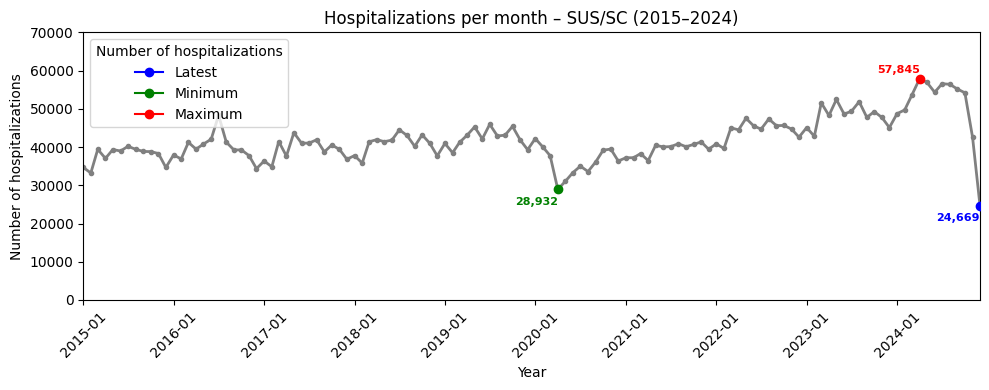

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker

# --- 1. PREPARAÇÃO DOS DADOS E LOCALIZAÇÃO DOS PONTOS CHAVE ---

x_data = pd_df_mensal["data"]
y_data = pd_df_mensal["internacoes"].astype(int)

# 1. Encontra o ponto máximo
idx_max = y_data.idxmax()

# 2. Encontra o ponto mais recente
idx_last = y_data.index[-1]

# 3. Lógica para encontrar o valor mínimo diferente do mais recente (se forem o mesmo)
idx_min = y_data.idxmin() # Inicia com o mínimo original
if idx_min == idx_last:
    # Cria uma cópia da série de dados excluindo o último ponto
    y_data_excl_last = y_data.drop(index=idx_last)

    # Encontra o mínimo no restante dos dados
    if not y_data_excl_last.empty:
        idx_min = y_data_excl_last.idxmin()
    else:
        idx_min = y_data.idxmin()

# Define o conjunto final de índices para rotular
indices_to_label = set([idx_max, idx_min, idx_last])
# ---------------------------------------------------------------

plt.figure(figsize=(10, 4))

# PLOTAGEM DA LINHA BASE (ATENÇÃO: Marcador base no seu código foi incluído, mas é redundante com a plotagem colorida)
plt.plot(x_data, y_data, color='gray', linewidth=2, marker='o', markersize=3)

plt.title("Hospitalizations per month – SUS/SC (2015–2024)")
plt.xlabel("Year")
plt.ylabel("Number of hospitalizations")
plt.ylim(ymin=0, ymax=70000)
plt.xlim(xmin=pd.to_datetime("2015-01-01"), xmax=pd.to_datetime("2024-12-01"))

# --- CONFIGURAÇÃO DO EIXO X (Mês/Ano) ---
ax = plt.gca()
date_form = mdates.DateFormatter('%Y-%m')
ax.xaxis.set_major_formatter(date_form)

# Variáveis de controle para garantir que cada item de legenda seja adicionado apenas uma vez
legend_labels = {
    'red': 'Maximum',
    'green': 'Minimum',
    'blue': 'Latest'
}
labels_plotted = set()

# --- 2. ADIÇÃO DOS RÓTULOS E MARCADORES COLORIDOS ---
for idx in indices_to_label:
    x = x_data[idx]
    y = y_data[idx]

    # Formata o texto como número inteiro com separador de milhar
    label_text = '{:,.0f}'.format(y)

    # --- Lógica de Posicionamento Aprimorada e Estilos ---
    current_label = None # Inicializa o rótulo da legenda

    if idx == idx_max:
        vertical_alignment = 'bottom'
        offset = 1000
        color_label = 'red'
        current_label = legend_labels[color_label]

    elif idx == idx_min:
        vertical_alignment = 'top'
        offset = -2000
        color_label = 'green'
        current_label = legend_labels[color_label]

    elif idx == idx_last:
        vertical_alignment = 'top'
        offset = -2000
        color_label = 'blue'
        current_label = legend_labels[color_label]

    else:
        continue

    # RÓTULO DE TEXTO (inalterado)
    plt.text(x, y + offset, label_text,
             ha='right',
             va=vertical_alignment,
             fontsize=8,
             fontweight='bold',
             color=color_label,
             zorder=10)

    # MARCADOR COLORIDO
    # Se este rótulo de legenda (cor) ainda não foi plotado, adicione o argumento label
    if color_label not in labels_plotted:
        plt.plot(x, y, marker='o', markersize=6, color=color_label, zorder=5, label=current_label)
        labels_plotted.add(color_label) # Marca a cor como plotada
    else:
        # Se o rótulo já foi plotado, apenas plote o marcador sem rótulo de legenda
        plt.plot(x, y, marker='o', markersize=6, color=color_label, zorder=5)


# -------------------------------------------

plt.xticks(rotation=45)

# CHAMADA FINAL PARA EXIBIR A LEGENDA
plt.legend(title='Number of hospitalizations', loc='upper left')

plt.tight_layout()
plt.show()

## Internações mensais por sexo

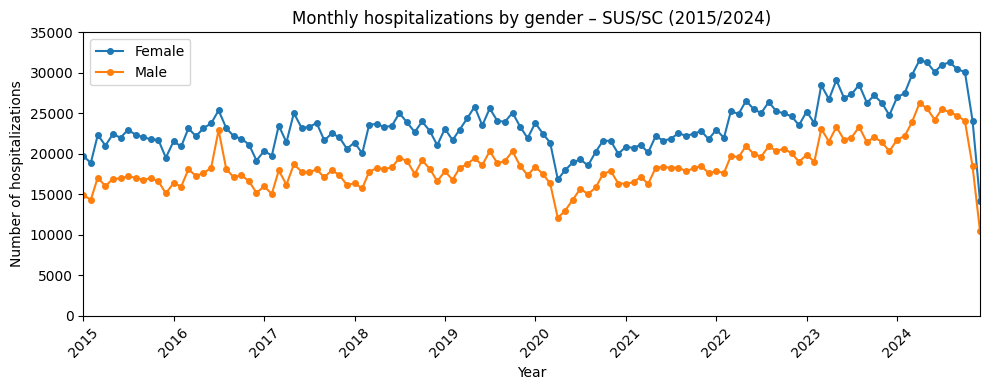

In [62]:
pdf_mensal_sexo = df_mensal_sexo.to_pandas()
pdf_mensal_sexo["data"] = pd.to_datetime(
    pdf_mensal_sexo["ano"].astype(str) + "-" + pdf_mensal_sexo["mes"].astype(str) + "-01"
)

# Pivot para colunas por sexo
pivot_sexo = pdf_mensal_sexo.pivot_table(
    index="data",
    columns="SEXO",
    values="internacoes",
    aggfunc="sum"
).sort_index()

plt.figure(figsize=(10, 4))
for sexo in pivot_sexo.columns:
    plt.plot(pivot_sexo.index, pivot_sexo[sexo], label=f"{sexo}", marker='o', markersize=4)

plt.title("Monthly hospitalizations by gender – SUS/SC (2015/2024)")
plt.xlabel("Year")
plt.ylabel("Number of hospitalizations")
plt.ylim(ymin=0, ymax=35000)
plt.xlim(xmin=pd.to_datetime("2015-01-01"), xmax=pd.to_datetime("2024-12-01"))
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


## Heatmap de internações mensais por faixa etária

/tmp/ipython-input-1876360159.py:42: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_faixa = pd_df_mensal_faixa.pivot_table(


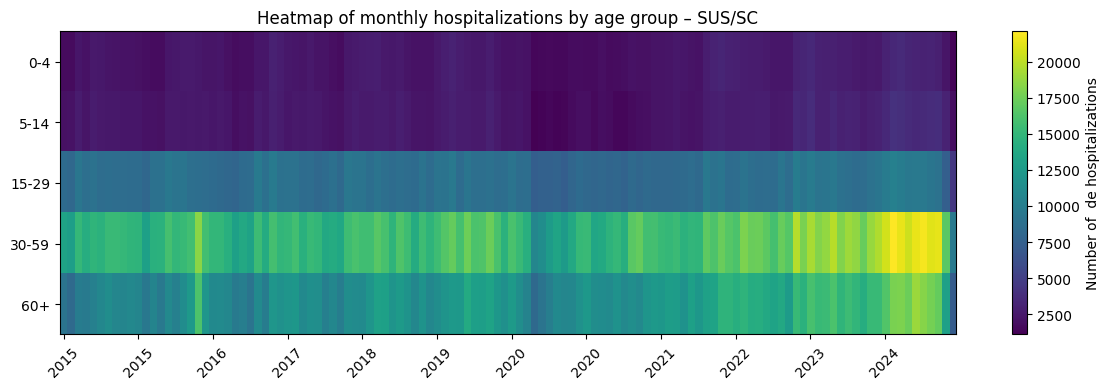

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import re # Módulo para expressões regulares

# --- 1. PRÉ-PROCESSAMENTO: CRIAÇÃO DA ORDEM LÓGICA ---

pd_df_mensal_faixa = df_mensal_faixa.to_pandas()
pd_df_mensal_faixa["data"] = pd.to_datetime(
    pd_df_mensal_faixa["ano"].astype(str) + "-" + pd_df_mensal_faixa["mes"].astype(str) + "-01"
)

# 1. Obter todas as faixas únicas e ordená-las numericamente
faixas_unicas = pd_df_mensal_faixa["faixa_etaria"].unique()

# Função auxiliar para extrair o limite inferior da idade para ordenação
def extract_min_age(faixa):
    faixa = str(faixa).lower()

    if 'menor de 1 ano' in faixa:
        return 0
    if 'sem idade' in faixa:
        return 9999 # Coloca no final
    if '80 anos e mais' in faixa or '80 e mais' in faixa:
        return 80

    # Tenta extrair o primeiro número (limite inferior)
    match = re.search(r'(\d+)', faixa)
    if match:
        return int(match.group(1))
    return 5000 # Coloca faixas não identificadas no final

# 2. Criar a lista de faixas ordenadas
ordem_final = sorted(faixas_unicas, key=extract_min_age)

# 3. Aplicar o tipo de dado categórico ordenado
faixa_dtype = pd.CategoricalDtype(ordem_final, ordered=True)
pd_df_mensal_faixa["faixa_etaria"] = pd_df_mensal_faixa["faixa_etaria"].astype(faixa_dtype)

# --- 2. CRIAÇÃO E REORDENAÇÃO DO PIVOT ---
pivot_faixa = pd_df_mensal_faixa.pivot_table(
    index="faixa_etaria",      # Linhas = faixas (agora ordenadas)
    columns="data",            # Colunas = meses
    values="internacoes",
    aggfunc="sum"
)

# Se o pivot_table inverter a ordem (colocando o maior em cima), usamos .iloc[::-1] para reverter
# Ou, podemos reordenar explicitamente pelo índice categórico:
pivot_faixa = pivot_faixa.reindex(ordem_final)

# --- 3. PLOTAGEM DO HEATMAP ---
plt.figure(figsize=(12, 4))
plt.imshow(pivot_faixa, aspect="auto")
cbar = plt.colorbar(label="Number of  de hospitalizations")

# Os ticks do Y usam a ordem correta do índice
plt.yticks(
    range(len(pivot_faixa.index)),
    pivot_faixa.index
)

# Os ticks do X permanecem
plt.xticks(
    range(0, len(pivot_faixa.columns), max(1, len(pivot_faixa.columns)//12)),
    [d.strftime("%Y") for i, d in enumerate(pivot_faixa.columns)
     if i % max(1, len(pivot_faixa.columns)//12) == 0],
    rotation=45
)

plt.title("Heatmap of monthly hospitalizations by age group – SUS/SC")
plt.tight_layout()
plt.show()

## Internações mensais por capítulo do CID-10

/tmp/ipython-input-2375286562.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  line_colors = plt.cm.get_cmap('tab10', 4) # Escolhe 4 cores distintas


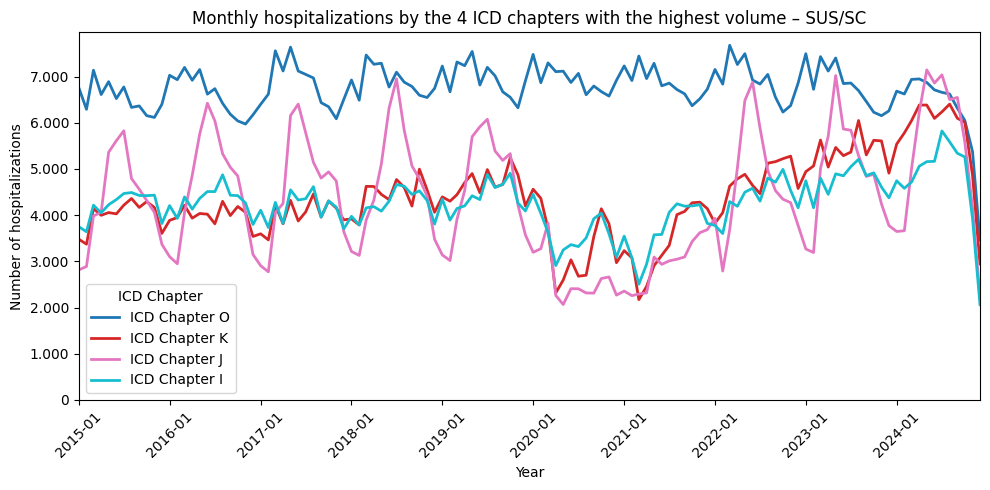

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import numpy as np # Importação útil

# --- 1. PRÉ-PROCESSAMENTO E CÁLCULO DO TOP 4 ---

# Seus dados de entrada (assumindo que já existem: df_mensal_cid)
pd_df_mensal_cid = df_mensal_cid.to_pandas()
pd_df_mensal_cid["data"] = pd.to_datetime(
    pd_df_mensal_cid["ano"].astype(str) + "-" + pd_df_mensal_cid["mes"].astype(str) + "-01"
)

# 1. Calcular a soma total de internações por capítulo
soma_por_capitulo = pd_df_mensal_cid.groupby("cid_capitulo")["internacoes"].sum()

# 2. Selecionar os 5 capítulos com as maiores somas
top_4_capitulos = soma_por_capitulo.nlargest(4).index.tolist()

# 3. Filtrar o DataFrame original apenas com os dados do Top 4
df_top_4 = pd_df_mensal_cid[pd_df_mensal_cid["cid_capitulo"].isin(top_4_capitulos)]

# Dicionário de cores para garantir distinção entre as 5 linhas
line_colors = plt.cm.get_cmap('tab10', 4) # Escolhe 4 cores distintas
# ---------------------------------------------------------------

plt.figure(figsize=(10, 5))
ax = plt.gca()

# --- 2. PLOTAGEM DOS DADOS ---
# Itera apenas sobre os capítulos do Top 4
for i, cap in enumerate(top_4_capitulos):
    # Filtra e garante que os dados estão ordenados por data
    sub = df_top_4[df_top_4["cid_capitulo"] == cap].sort_values("data")

    # Plota a linha usando a cor correspondente
    plt.plot(sub["data"], sub["internacoes"], label=f"ICD Chapter {cap}", color=line_colors(i), linewidth=2)

plt.title("Monthly hospitalizations by the 4 ICD chapters with the highest volume – SUS/SC")
plt.xlabel("Year")
plt.ylabel("Number of hospitalizations")

# --- 3. FORMATAÇÃO DO GRÁFICO ---
# Formato Mês/Ano no eixo X
date_form = mdates.DateFormatter('%Y-%m')
ax.xaxis.set_major_formatter(date_form)

# Formatação do Eixo Y (Milhares)
def thousands_formatter(x, pos):
    return '{:,.0f}'.format(x).replace(',', '_TEMP').replace('.', ',').replace('_TEMP', '.')
formatter = mticker.FuncFormatter(thousands_formatter)
ax.yaxis.set_major_formatter(formatter)

plt.xticks(rotation=45)
plt.legend(title='ICD Chapter')
plt.ylim(ymin=0) # Garante que o eixo Y comece em zero
plt.xlim(xmin=pd.to_datetime("2015-01-01"), xmax=pd.to_datetime("2024-12-01"))
plt.tight_layout()
plt.show()

In [ ]:
# # Em Polars: contar DIAG_PRINC
# top_cids = (
#     df_aih_rd
#     .group_by("DIAG_PRINC")
#     .agg(pl.count().alias("internacoes"))
#     .sort("internacoes", descending=True)
#     .head(50)
# )

# pdf_top_cids = top_cids.to_pandas().sort_values("internacoes")  # menor → maior p/ barh

# plt.figure(figsize=(16, 10))
# plt.barh(pdf_top_cids["DIAG_PRINC"], pdf_top_cids["internacoes"])
# plt.title("Top 10 diagnósticos principais – SUS/SC (2020–2025)")
# plt.xlabel("Número de internações")
# plt.ylabel("CID-10 (diagnóstico principal)")
# plt.tight_layout()
# plt.show()


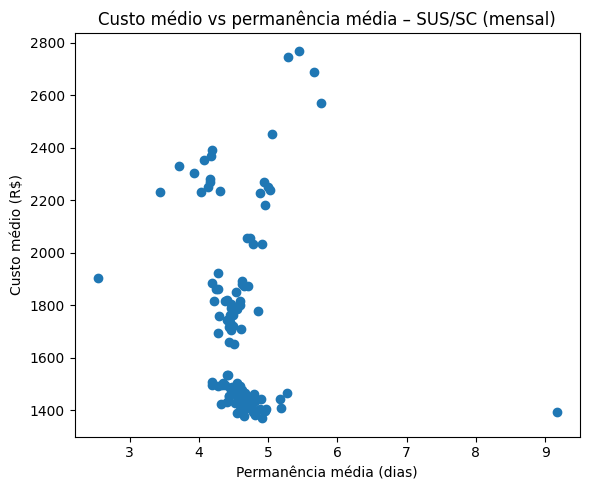

In [ ]:
# plt.figure(figsize=(6, 5))
# plt.scatter(pd_df_mensal["permanencia_media"], pd_df_mensal["custo_medio"])
# plt.title("Custo médio vs permanência média – SUS/SC (mensal)")
# plt.xlabel("Permanência média (dias)")
# plt.ylabel("Custo médio (R$)")
# plt.tight_layout()
# plt.show()


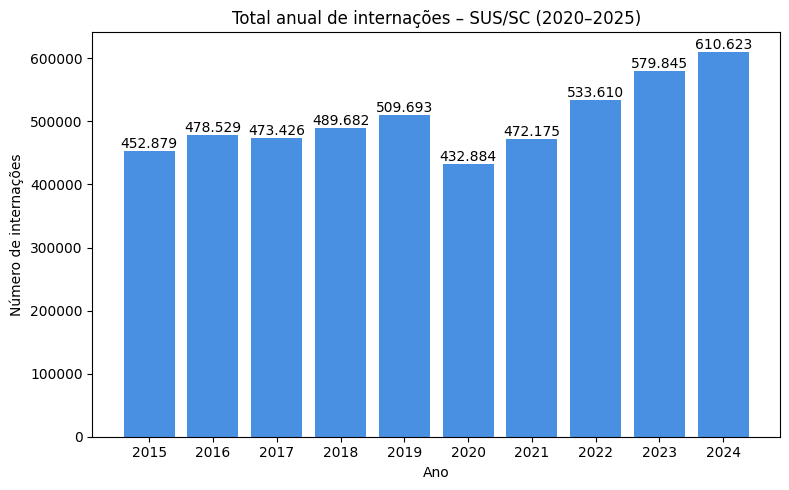

In [ ]:
# import matplotlib.pyplot as plt
# import pandas as pd

# # --------------------------------------------
# # 1. Agregação anual (Polars)
# # --------------------------------------------
# df_anual = (
#     df_mensal
#     .group_by("ano")
#     .agg([
#         pl.col("internacoes").sum().alias("internacoes_ano")
#     ])
#     .sort("ano")
# )

# # Converter para pandas
# pdf_anual = df_anual.to_pandas()

# # --------------------------------------------
# # 2. Plotagem – gráfico de barras
# # --------------------------------------------
# plt.figure(figsize=(8, 5))
# bars = plt.bar(pdf_anual["ano"], pdf_anual["internacoes_ano"], color="#4A90E2")

# plt.title("Total anual de internações – SUS/SC (2020–2025)")
# plt.xlabel("Ano")
# plt.ylabel("Número de internações")
# plt.xticks(pdf_anual["ano"])  # garante todos os anos no eixo
# for bar in bars:
#     height = bar.get_height()
#     plt.text(
#         bar.get_x() + bar.get_width() / 2,
#         height,
#         f"{int(height):,}".replace(",", "."),   # formatação 12.345.678
#         ha="center",
#         va="bottom",
#         fontsize=10
#     )
# plt.tight_layout()
# plt.show()


## Letalidade Hospitalar

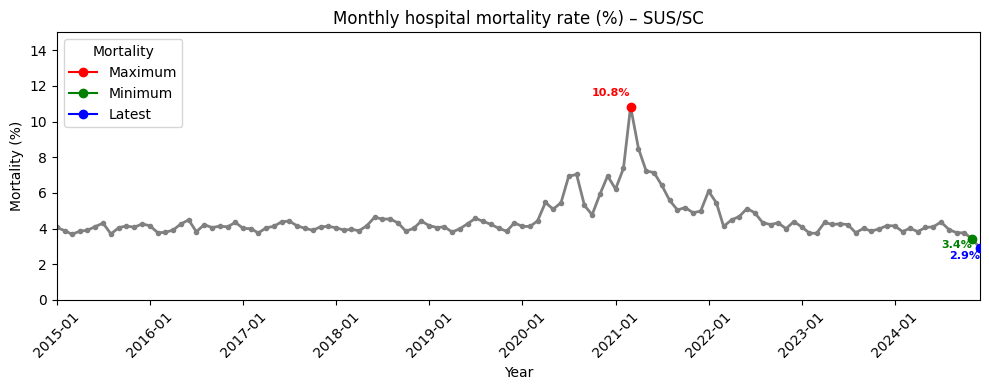

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# --- 1. PREPARAÇÃO DOS DADOS E LOCALIZAÇÃO DOS PONTOS CHAVE ---

x_data = pd_df_mensal["data"]
y_data = pd_df_mensal["letalidade_pct"]

# 1. Encontra o ponto máximo
idx_max = y_data.idxmax()

# 2. Encontra o ponto mais recente
idx_last = y_data.index[-1]

# 3. Lógica para encontrar o valor mínimo diferente do mais recente (se forem o mesmo)
idx_min = y_data.idxmin()
if idx_min == idx_last:
    y_data_excl_last = y_data.drop(index=idx_last)
    if not y_data_excl_last.empty:
        idx_min = y_data_excl_last.idxmin()

# Define o conjunto final de índices para rotular
indices_to_label = set([idx_max, idx_min, idx_last])
# ---------------------------------------------------------------

plt.figure(figsize=(10, 4))

# PLOTAGEM DA LINHA BASE (SEM MARCADORES PARA DEIXAR APENAS OS PONTOS CHAVE COLORIDOS)
plt.plot(x_data, y_data, color='gray', linewidth=2, marker='o', markersize=3)
# Nota: O argumento 'marker='o', markersize=3' foi removido da linha base para que apenas os pontos chaves tenham marcadores visíveis, conforme a prática comum de destaque.

plt.title("Monthly hospital mortality rate (%) – SUS/SC")
plt.xlabel("Year")
plt.ylabel("Mortality (%)")
plt.ylim(ymin=0, ymax=15)
plt.xlim(xmin=pd.to_datetime("2015-01-01"), xmax=pd.to_datetime("2024-12-01"))

# --- CONFIGURAÇÃO DO EIXO X (Mês/Ano) ---
ax = plt.gca()
date_form = mdates.DateFormatter('%Y-%m')
ax.xaxis.set_major_formatter(date_form)

# Variáveis de controle para a legenda
legend_labels = {
    'red': 'Maximum',
    'green': 'Minimum',
    'blue': 'Latest'
}
labels_plotted = set()

# --- 2. ADIÇÃO DOS RÓTULOS E MARCADORES COLORIDOS ---
for idx in indices_to_label:
    x = x_data[idx]
    y = y_data[idx]

    label_text = f"{y:.1f}%"
    current_label = None # Rótulo que será usado na legenda

    # --- Lógica de Posicionamento e Cores ---
    if idx == idx_max:
        vertical_alignment = 'bottom'
        color_label = 'red'
        offset = 0.5
        current_label = legend_labels[color_label]

    elif idx == idx_last:
        vertical_alignment = 'top'
        color_label = 'blue'
        offset = -0.2
        current_label = legend_labels[color_label]

    elif idx == idx_min:
        vertical_alignment = 'bottom'
        color_label = 'green'
        offset = -0.6
        current_label = legend_labels[color_label]

    else:
        continue

    # RÓTULO DE TEXTO
    plt.text(x, y + offset, label_text,
             ha='right',
             va=vertical_alignment,
             fontsize=8,
             fontweight='bold',
             color=color_label,
             zorder=10)

    # MARCADOR COLORIDO (INCLUSÃO CONDICIONAL DO LABEL)
    if color_label not in labels_plotted:
        plt.plot(x, y, marker='o', markersize=6, color=color_label, zorder=5, label=current_label)
        labels_plotted.add(color_label) # Marca a cor como plotada
    else:
        plt.plot(x, y, marker='o', markersize=6, color=color_label, zorder=5)


# -------------------------------------------

plt.xticks(rotation=45)

# CHAMADA FINAL PARA EXIBIR A LEGENDA
plt.legend(title='Mortality', loc='upper left')

plt.tight_layout()
plt.show()

## Permanência média mensal

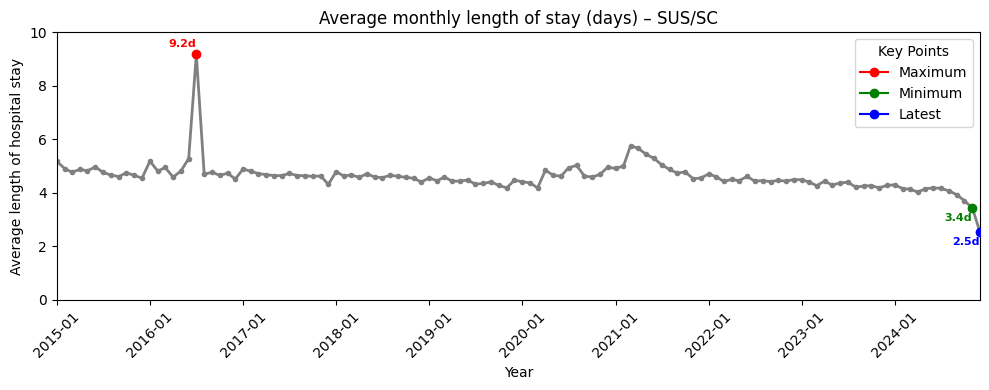

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# --- 1. PREPARAÇÃO DOS DADOS E LOCALIZAÇÃO DOS PONTOS CHAVE ---

x_data = pd_df_mensal["data"]
y_data = pd_df_mensal["permanencia_media"]

# 1. Encontra o ponto máximo
idx_max = y_data.idxmax()

# 2. Encontra o ponto mais recente
idx_last = y_data.index[-1]

# 3. Lógica para encontrar o valor mínimo diferente do mais recente
idx_min = y_data.idxmin() # Inicia com o mínimo original

if idx_min == idx_last:
    # Se o mínimo for o mais recente, encontra o segundo mínimo
    y_data_excl_last = y_data.drop(index=idx_last)
    # Se a série não estiver vazia, encontra o próximo mínimo.
    if not y_data_excl_last.empty:
        idx_min = y_data_excl_last.idxmin()
    # Caso contrário, mantém o mínimo original

# Define o conjunto final de índices para rotular
indices_to_label = set([idx_max, idx_min, idx_last])
# ---------------------------------------------------------------

plt.figure(figsize=(10, 4))

# PLOTAGEM DA LINHA BASE (REMOVIDO marker e markersize para destaque nos pontos-chave)
plt.plot(x_data, y_data, color='gray', linewidth=2, marker='o', markersize=3)

plt.title("Average monthly length of stay (days) – SUS/SC")
plt.xlabel("Year")
plt.ylabel("Average length of hospital stay")

# 5. AJUSTE DE ESCALA Y (começando em zero, ymax mantido)
plt.ylim(ymin=0, ymax=10)
plt.xlim(xmin=pd.to_datetime("2015-01-01"), xmax=pd.to_datetime("2024-12-01"))

# 6. FORMATAÇÃO DO EIXO X (Mês/Ano)
ax = plt.gca()
date_form = mdates.DateFormatter('%Y-%m')
ax.xaxis.set_major_formatter(date_form)

# Variáveis de controle para a legenda
legend_labels = {
    'red': 'Maximum',
    'green': 'Minimum',
    'blue': 'Latest'
}
labels_plotted = set()


# --- 7. ADIÇÃO DOS RÓTULOS E MARCADORES COLORIDOS ---
for idx in indices_to_label:
    x = x_data[idx]
    y = y_data[idx]

    # Formata o texto para incluir uma casa decimal (dias de internação)
    label_text = f"{y:.1f}d"
    current_label = None # Rótulo que será usado na legenda

    # --- Lógica de Posicionamento e Cores ---
    if idx == idx_max:
        # Ponto Máximo: Vermelho e acima
        vertical_alignment = 'bottom'
        color_label = 'red'
        offset = 0.2
        current_label = legend_labels[color_label]

    elif idx == idx_last:
        # Ponto Mais Recente: Azul e abaixo/centralizado para ajuste
        vertical_alignment = 'top'
        color_label = 'blue'
        offset = -0.2
        current_label = legend_labels[color_label]

    elif idx == idx_min:
        # Ponto Mínimo: Verde e abaixo
        vertical_alignment = 'top'
        color_label = 'green'
        offset = -0.2
        current_label = legend_labels[color_label]

    else:
        continue

    # RÓTULO DE TEXTO
    plt.text(x, y + offset, label_text,
             ha='right',
             va=vertical_alignment,
             fontsize=8,
             fontweight='bold',
             color=color_label,
             zorder=10)

    # MARCADOR COLORIDO (INCLUSÃO CONDICIONAL DO LABEL)
    if color_label not in labels_plotted:
        plt.plot(x, y, marker='o', markersize=6, color=color_label, zorder=5, label=current_label)
        labels_plotted.add(color_label) # Marca a cor como plotada
    else:
        plt.plot(x, y, marker='o', markersize=6, color=color_label, zorder=5)

# -------------------------------------------

plt.xticks(rotation=45)

# CHAMADA FINAL PARA EXIBIR A LEGENDA
plt.legend(title='Key Points', loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:
# plt.figure(figsize=(10, 4))
# plt.plot(pd_df_mensal["data"], pd_df_mensal["custo_medio"])
# plt.title("Custo médio mensal por internação – SUS/SC")
# plt.xlabel("Ano")
# plt.ylabel("Custo médio (R$)")
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()


## Custo médio mensal por internação

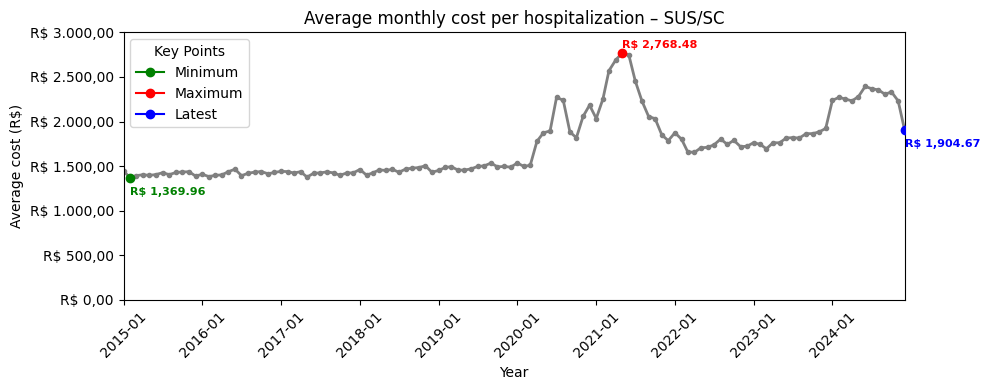

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker

# --- 1. PREPARAÇÃO DOS DADOS E LOCALIZAÇÃO DOS PONTOS CHAVE ---

x_data = pd_df_mensal["data"]
y_data = pd_df_mensal["custo_medio"]

# 1. Encontra o ponto máximo
idx_max = y_data.idxmax()

# 2. Encontra o ponto mais recente
idx_last = y_data.index[-1]

# 3. Lógica para encontrar o valor mínimo diferente do mais recente
idx_min = y_data.idxmin() # Inicia com o mínimo original

if idx_min == idx_last:
    # Se o mínimo for o mais recente, encontra o segundo mínimo
    y_data_excl_last = y_data.drop(index=idx_last)
    if not y_data_excl_last.empty:
        idx_min = y_data_excl_last.idxmin()

# Define o conjunto final de índices para rotular
indices_to_label = set([idx_max, idx_min, idx_last])
# ---------------------------------------------------------------

plt.figure(figsize=(10, 4))

# PLOTAGEM DA LINHA BASE (SEM MARCADORES PARA DESTAQUE)
plt.plot(x_data, y_data, color='gray', linewidth=2, marker='o', markersize=3)

plt.title("Average monthly cost per hospitalization – SUS/SC")
plt.xlabel("Year")
plt.ylabel("Average cost (R$)")

# AJUSTE DE ESCALA Y
plt.ylim(ymin=0, ymax=3000)
plt.xlim(xmin=pd.to_datetime("2015-01-01"), xmax=pd.to_datetime("2024-12-01"))

# FORMATAÇÃO DO EIXO X (Mês/Ano)
ax = plt.gca()
date_form = mdates.DateFormatter('%Y-%m')
ax.xaxis.set_major_formatter(date_form)

# FORMATAÇÃO DO EIXO Y PARA MOEDA (R$)
def currency_formatter(x, pos):
    """Formata um valor float para string de moeda R$"""
    return 'R$ {:,.2f}'.format(x).replace(',', '_TEMP').replace('.', ',').replace('_TEMP', '.')

formatter = mticker.FuncFormatter(currency_formatter)
ax.yaxis.set_major_formatter(formatter)

# Variáveis de controle para a legenda
legend_labels = {
    'red': 'Maximum',
    'green': 'Minimum',
    'blue': 'Latest'
}
labels_plotted = set()


# --- 2. ADIÇÃO DOS RÓTULOS E MARCADORES COLORIDOS ---
for idx in indices_to_label:
    x = x_data[idx]
    y = y_data[idx]

    # Formata o texto como R$ com duas casas decimais
    label_text = 'R$ {:,.2f}'.format(y)
    current_label = None # Rótulo que será usado na legenda

    # --- Lógica de Posicionamento e Cores ---

    if idx == idx_max:
        vertical_alignment = 'bottom'
        color_label = 'red'
        offset = 30
        current_label = legend_labels[color_label]

    elif idx == idx_last:
        vertical_alignment = 'top'
        color_label = 'blue'
        offset = -100
        current_label = legend_labels[color_label]

    elif idx == idx_min:
        vertical_alignment = 'top'
        color_label = 'green'
        offset = -100
        current_label = legend_labels[color_label]

    else:
        continue

    # RÓTULO DE TEXTO
    plt.text(x, y + offset, label_text,
             ha='left',
             va=vertical_alignment,
             fontsize=8,
             fontweight='bold',
             color=color_label,
             zorder=10)

    # MARCADOR COLORIDO (INCLUSÃO CONDICIONAL DO LABEL)
    if color_label not in labels_plotted:
        plt.plot(x, y, marker='o', markersize=6, color=color_label, zorder=5, label=current_label)
        labels_plotted.add(color_label) # Marca a cor como plotada
    else:
        plt.plot(x, y, marker='o', markersize=6, color=color_label, zorder=5)


# -------------------------------------------

plt.xticks(rotation=45)

# CHAMADA FINAL PARA EXIBIR A LEGENDA
plt.legend(title='Key Points', loc='upper left')

plt.tight_layout()
plt.show()

## Custo total mensal por internação

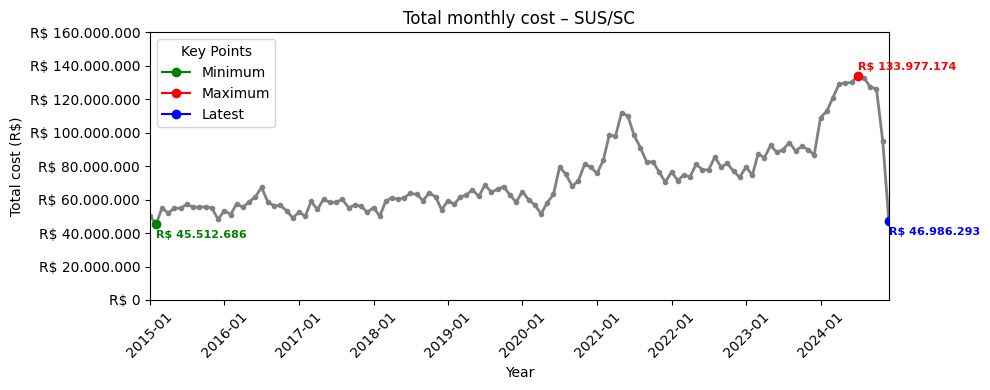

In [73]:
# --- 1. PREPARAÇÃO DOS DADOS E LOCALIZAÇÃO DOS PONTOS CHAVE ---

x_data = pd_df_mensal["data"]
y_data = pd_df_mensal["total_gasto"]

# 1. Encontra o ponto máximo
idx_max = y_data.idxmax()

# 2. Encontra o ponto mais recente
idx_last = y_data.index[-1]

# 3. Lógica para encontrar o valor mínimo diferente do mais recente
idx_min = y_data.idxmin()
if idx_min == idx_last:
    y_data_excl_last = y_data.drop(index=idx_last)
    if not y_data_excl_last.empty:
        idx_min = y_data_excl_last.idxmin()

# Define o conjunto final de índices para rotular
indices_to_label = set([idx_max, idx_min, idx_last])
# ---------------------------------------------------------------

plt.figure(figsize=(10, 4))

# PLOTAGEM BASE: Linha sem marcador (marker='o',markersize=4' removidos ou ajustados)
plt.plot(x_data, y_data, color='gray', linewidth=2, marker='o',markersize=3)

plt.title("Total monthly cost – SUS/SC")
plt.xlabel("Year")
plt.ylabel("Total cost (R$)")

# AJUSTE DE ESCALA Y
plt.ylim(ymin=0, ymax=160000000)
plt.xlim(xmin=pd.to_datetime("2015-01-01"), xmax=pd.to_datetime("2024-12-01"))

# FORMATAÇÃO DOS EIXOS
ax = plt.gca()
date_form = mdates.DateFormatter('%Y-%m')
ax.xaxis.set_major_formatter(date_form)

def currency_formatter(x, pos):
    return 'R$ {:,.0f}'.format(x).replace(',', '_TEMP').replace('.', ',').replace('_TEMP', '.')
formatter = mticker.FuncFormatter(currency_formatter)
ax.yaxis.set_major_formatter(formatter)

# --- 2. ADIÇÃO DE MARCADORES E RÓTULOS COLORIDOS ---

# Cria um dicionário para mapear os índices aos seus respectivos estilos
point_styles = {
    idx_max: {'color': 'red', 'label': 'Maximum'},
    idx_min: {'color': 'green', 'label': 'Minimum'},
    idx_last: {'color': 'blue', 'label': 'Latest'}
}

for idx in indices_to_label:
    x = x_data[idx]
    y = y_data[idx]
    style = point_styles.get(idx)

    if style:
        color_label = style['color']

        # Rotulagem
        label_text = 'R$ {:,.0f}'.format(y).replace(',', '_TEMP').replace('.', ',').replace('_TEMP', '.')
        offset = y_data.max() * 0.01

        if idx == idx_max:
            vertical_alignment = 'top'
            offset *= 6
        elif idx == idx_last:
            vertical_alignment = 'bottom'
            offset *= -7
        elif idx == idx_min:
            vertical_alignment = 'bottom'
            offset *= -7

        # RÓTULO DE TEXTO
        plt.text(x, y + offset, label_text,
                 ha='left',
                 va=vertical_alignment,
                 fontsize=8,
                 fontweight='bold',
                 color=color_label,
                 zorder=10)

        # MARCADOR COLORIDO (com label para a legenda)
        plt.plot(x, y, marker='o', markersize=6, color=color_label, zorder=5, label=style['label'])


# -------------------------------------------

plt.xticks(rotation=45)

# CHAMADA FINAL PARA EXIBIR A LEGENDA
plt.legend(title='Key Points', loc='upper left')

plt.tight_layout()
plt.show()